# Minimal music of (minimal) change

After John Cage

In [1]:
import numpy as np
from IChing import hexagram

In [3]:
from musicntwrk.comptools.displayNotes import displayNotes
from musicntwrk.comptools.music import Rest,Note,NoteSeq

## I-Ching simulator

In [20]:
o,y = hexagram(True)

                               22          23
yang -> yang :  ======= ||   =======  >  =======  
yin -> yin   :  ==   == ||   ==   ==  >  ==   ==  
yin -> yin   :  ==   == ||   ==   ==  >  ==   ==  
yang -> yin  :  == O == ||   =======  >  ==   ==  
yin -> yin   :  ==   == ||   ==   ==  >  ==   ==  
yang -> yin  :  == O == ||   =======  >  ==   ==  

22. Pi / Grace
23. Po / Splitting Apart


## Simple charts for pitch, octave, duration

In [22]:
# define pitches and octave groups - only 32 since the remaining are rests

Pgroup = []
Poctave = []
for i in range(32):
    npitches = hexagram(False)[1]%4+1
    pcs = []
    poct = []
    for n in range(npitches):
        pcs.append(hexagram(False)[1]%12)
        poct.append(hexagram(False)[1]%3+4)
    Pgroup.append(pcs)
    Poctave.append(poct)

# make dictionary
Pgdict = dict(zip(range(0,64,2),Pgroup))
Podict = dict(zip(range(0,64,2),Poctave))

In [9]:
# define duration groups

# duration mapping
dmap = {0:1/2, 1:1/4, 2:1/8, 3:1/16}

Pdur = []
for i in range(64):
    try:
        ndur = len(Pgdict[i])
    except:
        ndur = hexagram(False)[1]%4+1
    dur = []
    for n in range(ndur):
        dur.append(dmap[hexagram(False)[1]%4])
    Pdur.append(dur)

# make dictionary
Pddict = dict(zip(range(0,64),Pdur))

In [11]:
# generate a NoteSeq sequence

Lseq = 48
music = NoteSeq()

for l in range(Lseq):
    hexa = hexagram(False)[1]
    try:
        pitch = Pgdict[hexa-1]
        octave = Podict[hexa-1]
        dur = Pddict[hexa-1]
        for i in range(len(pitch)):
            music.append(Note(pitch[i], octave[i], dur[i], 120))
    except:
        dur = Pddict[hexa-1]
        for i in range(len(dur)):
            music.append(Rest(dur[i]))

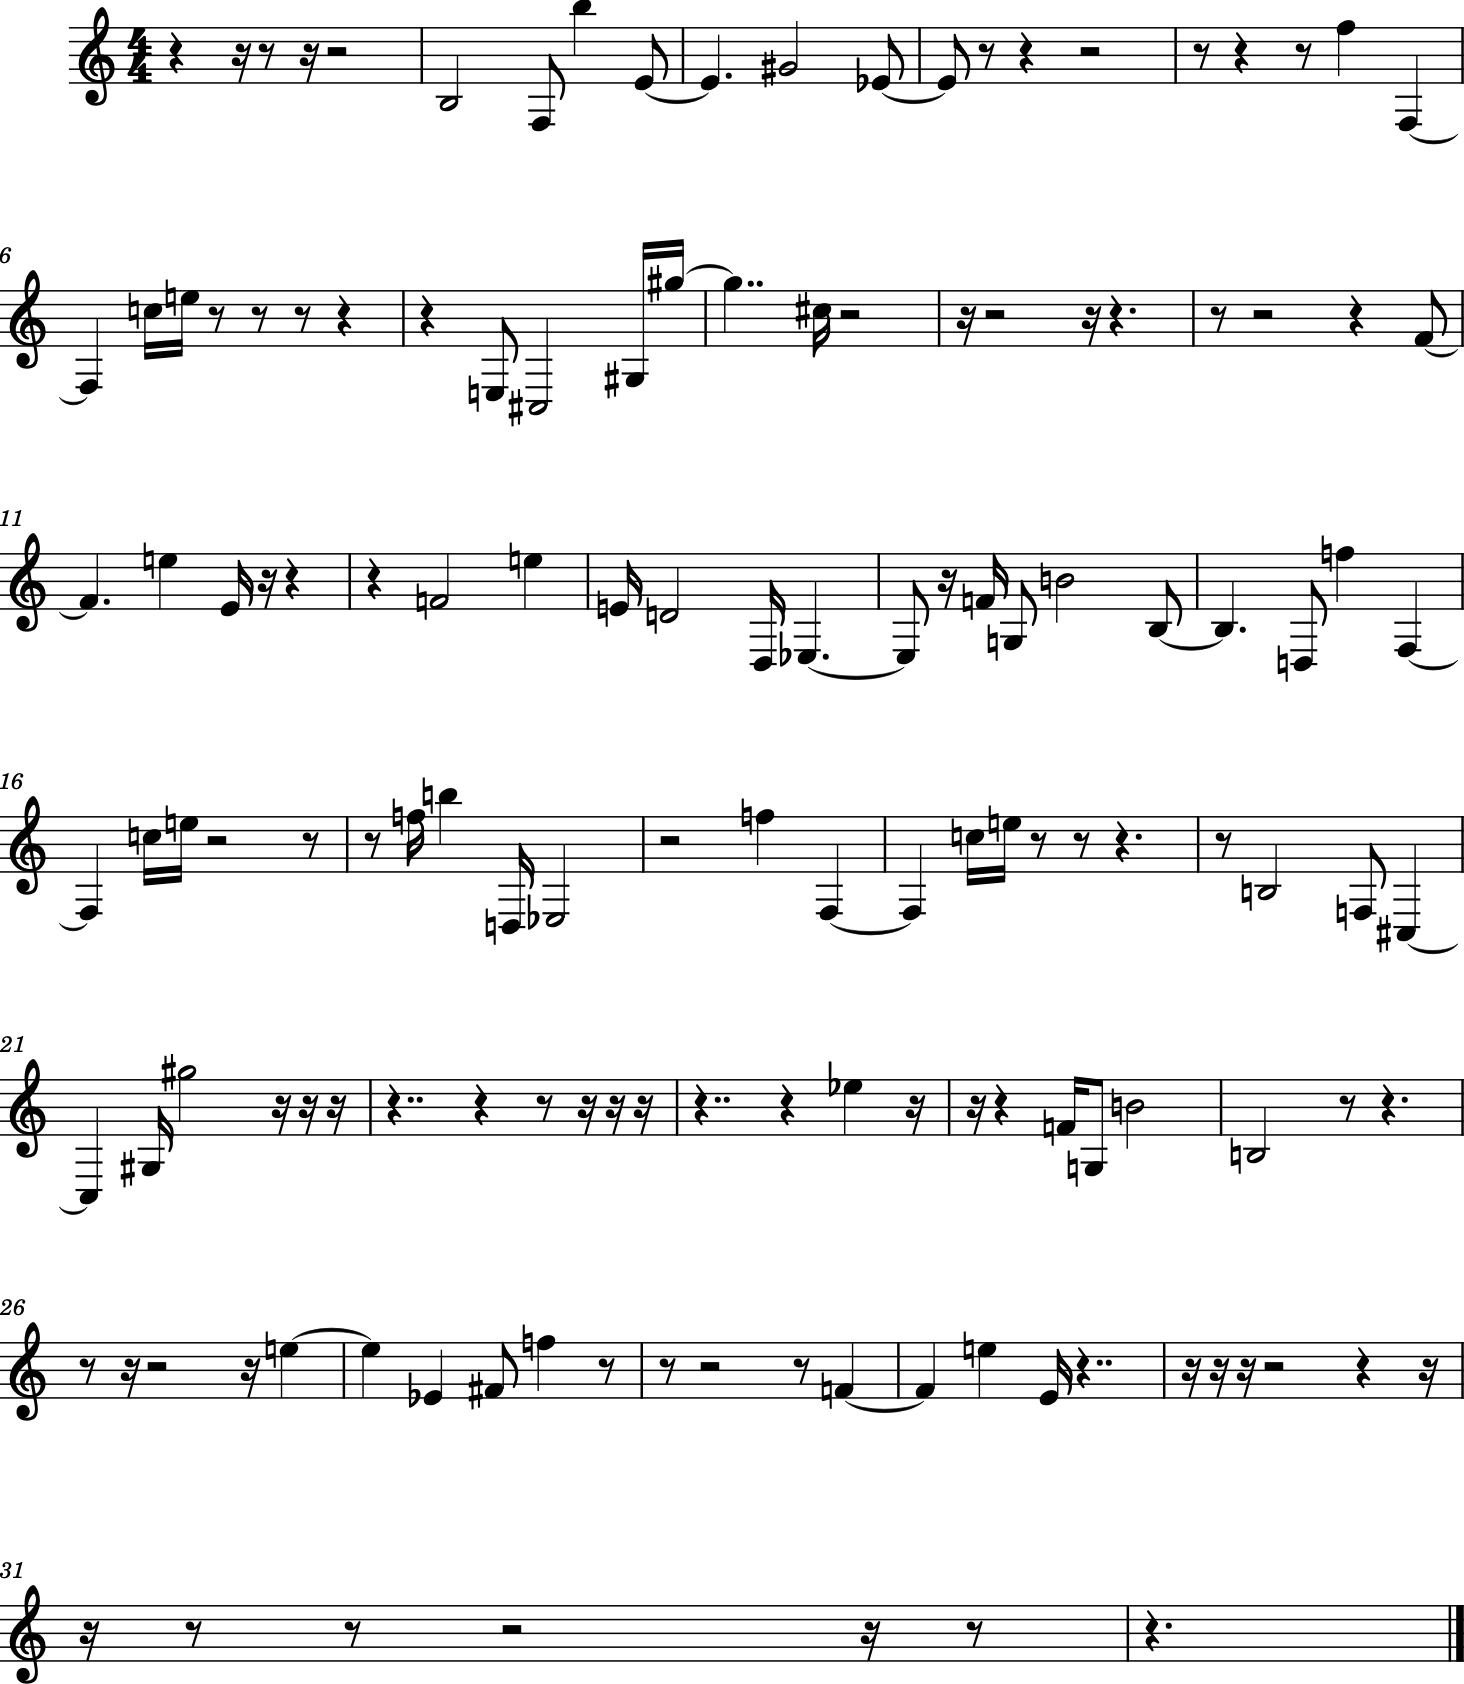

In [13]:
displayNotes([music],show='midi')